In [1]:
import scipy
import copy
import pandas
import numpy
import matplotlib.pyplot as plt

from IPython.display import display, HTML

plt.rcParams['figure.figsize'] = (60,150)
%matplotlib inline

pandas.set_option('display.max_rows', 500)
pandas.set_option('display.max_columns', 50)


Getting the cards information from a specific set
Please right down the set name correctly

In [2]:
setName = 'Guilds of Ravnica'
cardSet = pandas.read_csv('dataSet/sets/'+setName+'.csv')

Showing the first card from the set file

In [3]:
print(cardSet.shape[0] )
display(cardSet.head(1))

283


,name,multiverse_id,layout,names,mana_cost,cmc,colors,color_identity,type,supertypes,subtypes,rarity,text,flavor,artist,number,power,toughness,loyalty,variations,watermark,border,timeshifted,hand,life,reserved,release_date,starter,rulings,foreign_names,printings,original_text,original_type,legalities,source,image_url,set,set_name,id
0,Blade Instructor,452751,normal,NaN,{2}{W},3,['White'],['W'],Creature — Human Soldier,NaN,"['Human', 'Soldier']",Common,"Mentor (Whenever this creature attacks, put a ...","""Watch carefully. The gap between death and vi...",Zoltan Boros,1,3,1.0,NaN,NaN,Boros,NaN,NaN,NaN,NaN,NaN,NaN,"[{'text': ""Mentor compares the power of the cr...","[{'name': 'Klingen-Ausbilderin', 'imageUrl': '...",['GRN'],"Mentor <i>(Whenever this creature attacks, put...",Creature — Human Soldier,NaN,NaN,http://gatherer.wizards.com/Handlers/Image.ash...,GRN,Guilds of Ravnica,aab699fa4415a7b8a92c5ea4146d7ed6eb184ddf,NaN


In [4]:
mythicCards = cardSet[cardSet['rarity'] == 'Mythic Rare']
rareCards = cardSet[cardSet['rarity'] == 'Rare']
uncommonCards = cardSet[cardSet['rarity'] == 'Uncommon']
commonCards = cardSet[cardSet['rarity'] == 'Common']

c:\users\wesley\appdata\local\programs\python\python35-32\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


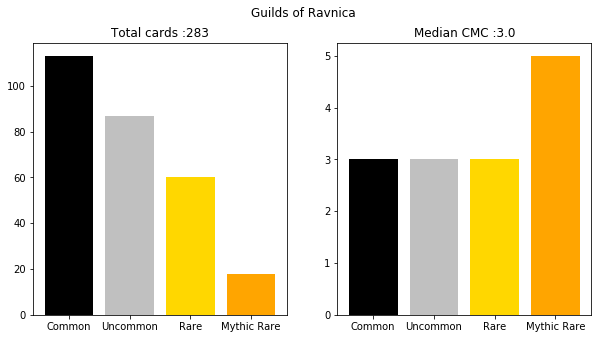

In [6]:
rarity = ['Common','Uncommon','Rare','Mythic Rare']
rarityColors = ['black', 'silver', 'gold', 'orange']

fig, (left, right) = plt.subplots(ncols=2, figsize=(10, 5))

totalCards = [commonCards.shape[0], uncommonCards.shape[0], 
              rareCards.shape[0], mythicCards.shape[0]]
barCount = left.bar(rarity, totalCards, color=rarityColors)
left.set_title('Total cards :' + str(cardSet.shape[0]))

cmcMedian = [commonCards['cmc'].median(), uncommonCards['cmc'].median(), 
              rareCards['cmc'].median(), mythicCards['cmc'].median()]
barListCmc = right.bar(rarity, cmcMedian, color=rarityColors)
right.set_title('Median CMC :' + str(cardSet['cmc'].median()))

fig.suptitle(setName)
fig.show()

Maybe do sometime of search on cards with planeswalkers names like "how many cards with Liliana existis?" and what is the oldest card with a planeswalker name or something like this.

In [4]:
lilianaCards = cardSet[cardSet['name'].str.contains('Liliana')]
display(lilianaCards)

,name,multiverse_id,layout,names,mana_cost,cmc,colors,color_identity,type,supertypes,...,foreign_names,printings,original_text,original_type,legalities,source,image_url,set,set_name,id
96,"Liliana, Death's Majesty",426799,normal,NaN,{3}{B}{B},5,['Black'],['B'],Legendary Planeswalker — Liliana,['Legendary'],...,['AKH'],+1: Create a 2/2 black Zombie creature token. ...,Planeswalker — Liliana,"[{'legality': 'Legal', 'format': 'Brawl'}, {'l...",NaN,http://gatherer.wizards.com/Handlers/Image.ash...,AKH,Amonkhet,7e6be798f3e272480de2b6e22694709bf214e196,NaN
97,Liliana's Mastery,426800,normal,NaN,{3}{B}{B},5,['Black'],['B'],Enchantment,NaN,...,['AKH'],Zombies you control get +1/+1.\r\nWhen Liliana...,Enchantment,"[{'legality': 'Legal', 'format': 'Brawl'}, {'l...",NaN,http://gatherer.wizards.com/Handlers/Image.ash...,AKH,Amonkhet,e374f7dc27c2f0239cc2d984185ec0120974d155,NaN
289,"Liliana, Death Wielder",429667,normal,NaN,{5}{B}{B},7,['Black'],['B'],Legendary Planeswalker — Liliana,['Legendary'],...,['AKH'],+2: Put a -1/-1 counter on up to one target cr...,Planeswalker — Liliana,"[{'legality': 'Legal', 'format': 'Brawl'}, {'l...",NaN,http://gatherer.wizards.com/Handlers/Image.ash...,AKH,Amonkhet,7f23ccf4083339eef8705cd711ae84d4566bde60,NaN
291,Liliana's Influence,429669,normal,NaN,{4}{B}{B},6,['Black'],['B'],Sorcery,NaN,...,['AKH'],Put a -1/-1 counter on each creature you don't...,Sorcery,"[{'legality': 'Legal', 'format': 'Brawl'}, {'l...",NaN,http://gatherer.wizards.com/Handlers/Image.ash...,AKH,Amonkhet,a84b216608dbd696e17a8b5ff5621d41ac40f991,NaN


In [17]:
redCards = cardSet[cardSet['color_identity'] == "['R']"]
display(redCards)

,name,multiverse_id,layout,names,mana_cost,cmc,colors,color_identity,type,supertypes,subtypes,rarity,text,flavor,artist,number,power,toughness,loyalty,variations,watermark,border,timeshifted,hand,life,reserved,release_date,starter,rulings,foreign_names,printings,original_text,original_type,legalities,source,image_url,set,set_name,id
116,Ahn-Crop Crasher,426819,normal,NaN,{2}{R},3,['Red'],['R'],Creature — Minotaur Warrior,NaN,"['Minotaur', 'Warrior']",Uncommon,Haste\r\nYou may exert Ahn-Crop Crasher as it ...,"""Hesitation breeds dissension. To be worthy of...",Seb McKinnon,117,3,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[{'text': 'You can\'t exert a creature unless ...,[{'imageUrl': 'http://gatherer.wizards.com/Han...,['AKH'],Haste\r\nYou may exert Ahn-Crop Crasher as it ...,Creature — Minotaur Warrior,"[{'legality': 'Legal', 'format': 'Brawl'}, {'l...",NaN,http://gatherer.wizards.com/Handlers/Image.ash...,AKH,Amonkhet,e8b8d2db7a93833ce54002f0741a17c7bee707b1,NaN
117,Battlefield Scavenger,426820,normal,NaN,{1}{R},2,['Red'],['R'],Creature — Jackal Rogue,NaN,"['Jackal', 'Rogue']",Uncommon,You may exert Battlefield Scavenger as it atta...,NaN,Dan Scott,118,2,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[{'text': 'You can\'t exert a creature unless ...,[{'imageUrl': 'http://gatherer.wizards.com/Han...,['AKH'],You may exert Battlefield Scavenger as it atta...,Creature — Jackal Rogue,"[{'legality': 'Legal', 'format': 'Brawl'}, {'l...",NaN,http://gatherer.wizards.com/Handlers/Image.ash...,AKH,Amonkhet,b00668ea0f413d3f47f8c7c7cf02b4bd1f060895,NaN
118,Blazing Volley,426821,normal,NaN,{R},1,['Red'],['R'],Sorcery,NaN,NaN,Common,Blazing Volley deals 1 damage to each creature...,"The arrows fell like fiery rain, and for a mom...",Zezhou Chen,119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[{'imageUrl': 'http://gatherer.wizards.com/Han...,['AKH'],Blazing Volley deals 1 damage to each creature...,Sorcery,"[{'legality': 'Legal', 'format': 'Brawl'}, {'l...",NaN,http://gatherer.wizards.com/Handlers/Image.ash...,AKH,Amonkhet,f20d942b639f4014c2efdb30588ad8a07fc247e2,NaN
119,Bloodlust Inciter,426822,normal,NaN,{R},1,['Red'],['R'],Creature — Human Warrior,NaN,"['Human', 'Warrior']",Common,{T}: Target creature gains haste until end of ...,"""To victory! To glory! To eternity!""",Anthony Palumbo,120,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[{'imageUrl': 'http://gatherer.wizards.com/Han...,['AKH'],{T}: Target creature gains haste until end of ...,Creature — Human Warrior,"[{'legality': 'Legal', 'format': 'Brawl'}, {'l...",NaN,http://gatherer.wizards.com/Handlers/Image.ash...,AKH,Amonkhet,6b241fc882511ff2992c5dbd2b399e2a9b79f32e,NaN
120,Bloodrage Brawler,426823,normal,NaN,{1}{R},2,['Red'],['R'],Creature — Minotaur Warrior,NaN,"['Minotaur', 'Warrior']",Uncommon,"When Bloodrage Brawler enters the battlefield,...","To Hazoret, those who fight for her are her be...",Lars Grant-West,121,4,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[{'text': 'You can cast Bloodrage Brawler even...,[{'imageUrl': 'http://gatherer.wizards.com/Han...,['AKH'],"When Bloodrage Brawler enters the battlefield,...",Creature — Minotaur Warrior,"[{'legality': 'Legal', 'format': 'Brawl'}, {'l...",NaN,http://gatherer.wizards.com/Handlers/Image.ash...,AKH,Amonkhet,032d389c2faba0f07001e4505c23ce48d5ce5ea1,NaN
121,Brute Strength,426824,normal,NaN,{1}{R},2,['Red'],['R'],Instant,NaN,NaN,Common,Target creature gets +3/+1 and gains trample u...,"""Oketra had our crop build an obelisk to prove...",Nils Hamm,122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[{'imageUrl': 'http://gatherer.wizards.com/Han...,"['OGW', 'AKH', 'DDT']",Target creature gets +3/+1 and gains trample u...,Instant,"[{'legality': 'Legal', 'format': 'Brawl'}, {'l...",NaN,http://gatherer.wizards.com/Handlers/Image.ash...,AKH,Amonkhet,c5926d0f75e6c4e9833a19b0ce86336ee276d4ac,NaN
122,By Force,426825,normal,NaN,{X}{R},1,['Red'],['R'],Sorcery,NaN,NaN,Uncommon,Destroy X target artifacts.,"""Dissent? Your gods can't even begin to co